# The Python Ecosystem for Data Science: A Guided Tour

**PyData Warsaw 2017 | at the Copernicus Science Centre | 19-20 October 2017**

Christian Staudt  |  Independent Data Scientist |  clstaudt.me



<center><img src="datascientist.png" alt="" style="height: 550px;"/></center>


Source: [Stephan Kolassa @ Stackexchange](https://datascience.stackexchange.com/questions/2403/data-science-without-knowledge-of-a-specific-topic-is-it-worth-pursuing-as-a-ca)

# The (?) Data Science Workflow



<center><img src="data-science-workflow.jpg" alt="" style="width: 650px;"/></center>


Source: [Ben Lorica @ O'Reilly](https://www.oreilly.com/ideas/data-analysis-just-one-component-of-the-data-science-workflow)

In [1]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seaborn.set(style="ticks")


In [3]:
import warnings
warnings.filterwarnings('ignore')

<center><img src="FoodWebs.jpg" alt="" style="height: 600px;"/></center>


<center><img src="PyDataGraph.png" alt=""/></center>


# jupyter / ipython

## [nbdime](http://nbdime.readthedocs.io) 

- diff and merge tools for jupyter notebooks
- git integration!

<center><img src="nbdiff-web.png" alt="?" style="height: 500px;"/></center>


# numpy

<center><img src="numpy-logo.png" alt="?" style="height: 80px;"/></center>

- the fundamental package for numeric computing in Python
- provides
    - n-dimensional array object
    - powerful array functions 
    - math: linear algebra, random numbers, ...

In [4]:
import numpy

## numpy ndarray

 <img src="numpy-ndarray.jpg" style="height: 350px;">
 
 Source: [Travis Oliphant @ SIAM 2011](https://www.slideshare.net/enthought/numpy-talk-at-siam)

## numpy array vs python list

 <img src="array_vs_list.png" style="height: 250px;">
 
 Source: [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

## understand numpy - lose your loops




In [5]:
import random
import math

In [6]:
n = int(1e6)

In [7]:
%%timeit
a = [random.random() for i in range(n)]
b = [math.log(x) for x in a] 

475 ms ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
a = numpy.random.rand(n)
b = numpy.log(a) 

20.8 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# scipy

# pandas

<center><img src="pandas-logo.png" alt="?" style="height: 80px;"/></center>


- labeled, indexed array data structures (e.g. Series, DataFrame)
- operations (e.g. `join`, `groupby`, ...)
- time series support (e.g. selection by date range)
- input/output tools (e.g. CSV, Excel, ...)
- some statistics

## pandas example

**task: find the correlation between inhabitants and number of museums of the departements of France**


In [18]:
ls data

Departements.csv            Liste_musees_de_France.xls


In [19]:
import pandas

In [20]:
departements = pandas.read_csv("data/Departements.csv", sep=";")
departements.head()

,Nom du département,Nombre d'arrondissements,Nombre de cantons,Nombre de communes,Population municipale,Population totale
0,Ain,4,23.0,410,626.127,643.309
1,Aisne,5,21.0,805,539.783,554.040
2,Allier,3,19.0,318,343.062,353.262
3,Alpes-de-Haute-Provence,4,15.0,199,161.588,166.298
4,Hautes-Alpes,2,15.0,168,139.883,145.213


In [21]:
departements = departements[["Nom du département", "Population totale"]]

In [22]:
museums = pandas.read_excel("data/Liste_musees_de_France.xls")
museums.head(2)

,NOMREG,NOMDEP,DATEAPPELLATION,FERME,ANNREOUV,ANNEXE,NOM DU MUSEE,ADR,CP,VILLE,SITWEB,FERMETURE ANNUELLE,PERIODE OUVERTURE,JOURS NOCTURNES
0,ALSACE,BAS-RHIN,01/02/2003,NON,NaN,NaN,Musée de la Folie Marco,"30, Rue du Dr Sultzer",67140,BARR,www.barr.fr,Novembre à avril,Ouvert de mai à septembre du mercredi au lundi...,NaN
1,ALSACE,BAS-RHIN,01/02/2003,NON,NaN,NaN,Musée de la Poterie,"2, rue de Kuhlendorf",67660,BETSCHDORF,www.betschdorf.fr/tourisme/visiter_betschdrof/...,Novembre à mi-avril,Ouvert du mardi au samedi de 10h à 12h et de 1...,NaN


In [23]:
museum_count = museums.groupby("NOMDEP").size()
museum_count.head(5)

NOMDEP
AIN                        14
AISNE                      15
ALLIER                      9
ALPES DE HAUTE PROVENCE     9
ALPES-MARITIMES            33
dtype: int64

In [24]:
departements["Nom du département"] = departements["Nom du département"].apply(lambda s: s.upper())
departements["Nom du département"] = departements["Nom du département"].apply(lambda s: s.replace("-", " "))

In [25]:
departements.index = departements["Nom du département"]
departements.drop(["Nom du département"], axis=1, inplace=True)

In [26]:
joined = departements.join(pandas.DataFrame(museum_count, index=museum_count.index, columns=["number of museums"]))
joined.head(3)

,Population totale,number of museums
Nom du département,,
AIN,643.309,14.0
AISNE,554.040,15.0
ALLIER,353.262,9.0


In [27]:
joined["Population totale"] = joined["Population totale"].apply(lambda s: pandas.to_numeric(s, errors="drop"))
joined.corr()

,Population totale,number of museums
Population totale,1.000000,0.601027
number of museums,0.601027,1.000000


# dask

- **dask dataframe**
    - combiness many pandas dataframes (split along the index), **mimic pandas API**
    - use cases
        - manipulating **datasets not fitting comfortably into memory** on a single machine
        - **parallelizing** many pandas operations across **many cores**
        - **distributed computing** of very large tables (e.g. stored in parallel file systems)


<center><img src="dask-dataframe.png" alt="?" style="height: 300px;"/></center>



# theano

- a numerical computation library, including an optimizing compiler 

"lets you to define, optimize, and evaluate mathematical expressions, especially ones with multi-dimensional arrays (numpy.ndarray). Using Theano it is possible to attain speeds rivaling hand-crafted C implementations for problems involving large amounts of data. It can also surpass C on a CPU by many orders of magnitude by taking advantage of recent GPUs."

In [10]:
import theano

In [11]:
x = theano.tensor.dmatrix('x')
y = theano.tensor.dmatrix('y')
z = x + y
%time f = theano.function([x, y], z)

CPU times: user 174 ms, sys: 79.5 ms, total: 254 ms
Wall time: 1.49 s


In [12]:
f(numpy.eye(3), numpy.eye(3))

array([[ 2.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  2.]])

 <img src="apply.png" style="height: 250px;">

## Optimizations


- use of GPU for computations
- constant folding
- merging of similar subgraphs, to avoid redundant calculation
- arithmetic simplification (e.g. x*y/x -> y, --x -> x)
- inserting efficient BLAS operations (e.g. GEMM) in a variety of contexts
- using memory aliasing to avoid calculation
- using inplace operations wherever it does not interfere with aliasing
- loop fusion for elementwise sub-expressions
- improvements to numerical stability (e.g. \log(1+\exp(x)) and \log(\sum_i \exp(x[i])))
- for a complete list, see Optimizations


# tensorflow


## theano vs tensorflow


| theano |  	∩  | tensorflow |
|:-----------|:---------------------:|:------------|
|  |GPU and CPU code generation |  |
|  | | more built in functionality, higher level abstractions |
| more aggressive compute graph optimisation  | |  |
| many tunable parameters  | |  |
|  | | larger community  |
|  | | TensorBoard visualization tools  |





# scikit-learn

<center><img src="scikit-learn-logo.png" alt="?" style="height: 80px;"/></center>

- machine learning in Python
- provides
    - machine learning algorithms for classification, regression, clustering, dimensionality reduction, ...
    - building blocks of preprocessing and model selection workflows


<center><img src="ml_map.png" alt="?" style="height: 600px;"/></center>


## Estimators, Transformers, Pipelines

# keras

In [13]:
import keras

Using Theano backend.


In [14]:
from keras.models import Sequential
model = Sequential()

In [15]:
from keras.layers import Dense, Activation

model.add(Dense(units=64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# matplotlib 

<center><img src="matplotlib_logo.png" alt="?" style="height: 80px;"/></center>

- 2D plotting library
- provides
    - MATLAB-like interface via the `pyplot` API


In [16]:
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data

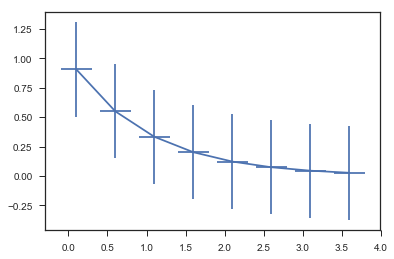

In [17]:
x = numpy.arange(0.1, 4, 0.5)
y = numpy.exp(-x)

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

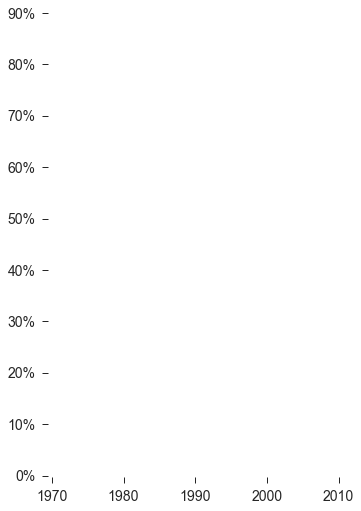

In [18]:
fname = get_sample_data('percent_bachelors_degrees_women_usa.csv')
gender_degree_data = csv2rec(fname)

color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

fig, ax = plt.subplots(1, 1, figsize=(6, 7))

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(1969.5, 2011.1)
ax.set_ylim(-0.25, 90)

# Make sure your axis ticks are large enough to be easily read.
plt.xticks(range(1970, 2011, 10), fontsize=14)
plt.yticks(range(0, 91, 10), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

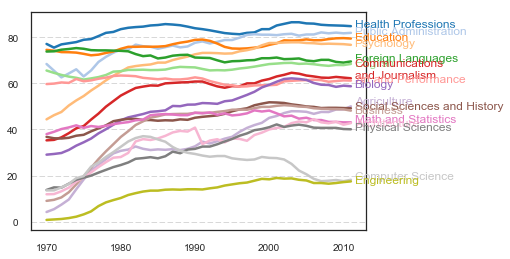

In [19]:
# Provide tick lines across the plot 
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')
# Now that the plot is prepared, it's time to actually plot the data!
majors = ['Health Professions', 'Public Administration', 'Education',
          'Psychology', 'Foreign Languages', 'English',
          'Communications\nand Journalism', 'Art and Performance', 'Biology',
          'Agriculture', 'Social Sciences and History', 'Business',
          'Math and Statistics', 'Architecture', 'Physical Sciences',
          'Computer Science', 'Engineering']
y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

for rank, column in enumerate(majors):
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_').lower()
    line = plt.plot(gender_degree_data.year,
                    gender_degree_data[column_rec_name],
                    lw=2.5,
                    color=color_sequence[rank])
    # Add a text label to the right end of every line. 
    y_pos = gender_degree_data[column_rec_name][-1] - 0.5
    if column in y_offsets:
        y_pos += y_offsets[column]
    plt.text(2011.5, y_pos, column, fontsize=12, color=color_sequence[rank])

fig.suptitle('Percentage of Bachelor\'s degrees conferred to women in '
             'the U.S.A. by major (1970-2011)\n', fontsize=18, ha='center');

In [20]:
plt.show()

# seaborn

<center><img src="seaborn.png" alt="?" style="height: 80px;"/></center>


- production-ready **statistical graphics** on top of matplotlib
    - fit and visualize linear regression models
    - visualize and cluster matrix data
    - plot time series data
- support for pandas and numpy data structures
- improved styling of matplotlib graphics (themes, color palettes, ...)
- abstractions for structuring grids of plots 


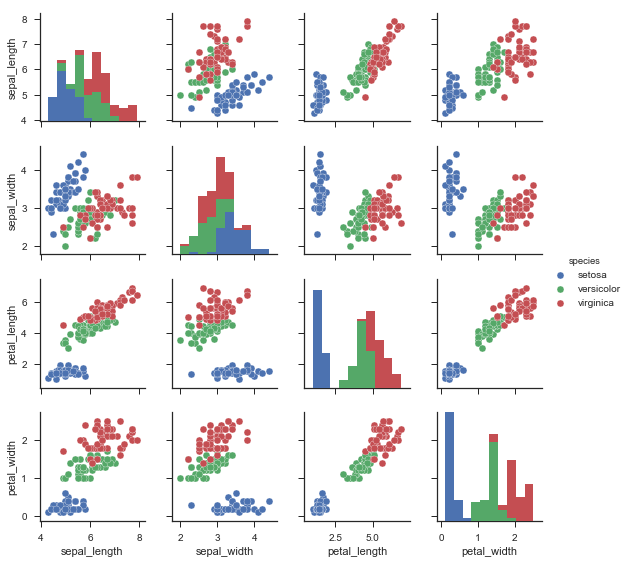

In [21]:
seaborn.pairplot(seaborn.load_dataset("iris"), hue="species", size=2);

<center><img src="seaborn-boxplot.png" alt="" style="height: 400px;"/></center>


# networkx

In [22]:
import networkx

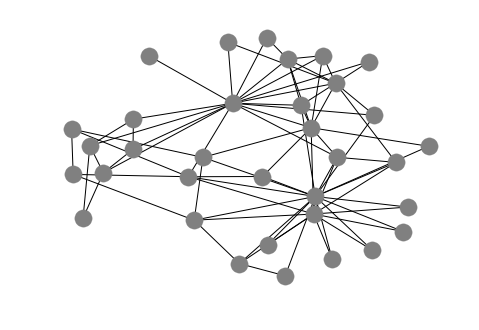

In [23]:
G = networkx.karate_club_graph()
networkx.draw(G, node_color='gray')

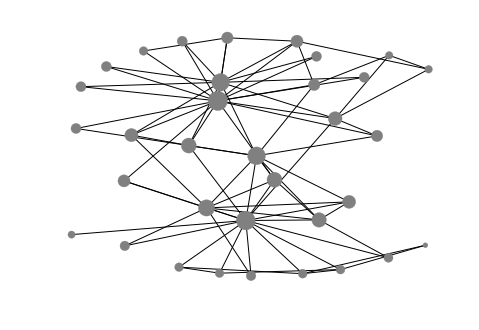

In [24]:
ec = networkx.eigenvector_centrality(G)
networkx.draw(G, node_size=numpy.fromiter(iter(ec.values()), dtype=float) * 1000, node_color='gray')

# statsmodels

<center><img src="statsmodels-logo.png" alt="?" style="height: 80px;"/></center>


- statistical models, test, and exploration
    - R replacement
- contents, e.g.
    - regression models
    - time series analysis (e.g. ARIMA)
    - statistical test (e.g. t-test)


## statsmodels vs scikit-learn

    

| statsmodels |  	∩  | scikit-learn |
|:-----------|:---------------------:|:------------|
| focus: statistical analysis & modeling | | focus: machine learning |
| | many models (e.g. OLS linear regression, logistic regression, ...) | |
| "hardcore" statistics (e.g. more diagnostic model parameters) | |        |      
| more R-like |  | more pythonic      |   
|  |  | modular approach (fit->transform->predict)    |   
|  |  | more mature development    |   

# bokeh

In [25]:
from bokeh import plotting
plotting.output_notebook()

Loading BokehJS ...

# holoviews

In [26]:
"""
Gapminder demo demonstrating how to combine to extend a HoloViews plot
with custom bokeh widgets to deploy an app.
"""


import holoviews

from bokeh.io import curdoc
from bokeh.layouts import layout
from bokeh.models import Slider, Button
from bokeh.sampledata import gapminder
from holoviews.plotting.bokeh import BokehRenderer

# Declare dataset
panel = pandas.Panel({'Fertility': gapminder.fertility,
                  'Population': gapminder.population,
                  'Life expectancy': gapminder.life_expectancy})
gapminder_df = panel.to_frame().reset_index().rename(columns={'minor': 'Year'})
gapminder_df = gapminder_df.merge(gapminder.regions.reset_index(), on='Country')
gapminder_df['Country'] = gapminder_df['Country'].astype('str')
gapminder_df['Group'] = gapminder_df['Group'].astype('str')
gapminder_df['Year'] = gapminder_df['Year'].astype('f')
ds = holoviews.Dataset(gapminder_df)

# Apply dimension labels and ranges
kdims = ['Fertility', 'Life expectancy']
vdims = ['Country', 'Population', 'Group']
dimensions = {
    'Fertility' : dict(label='Children per woman (total fertility)', range=(0, 10)),
    'Life expectancy': dict(label='Life expectancy at birth (years)', range=(15, 100)),
    'Population': ('population', 'Population')
}

# Create Points plotting fertility vs life expectancy indexed by Year
gapminder_ds = ds.redim(**dimensions).to(holoviews.Points, kdims, vdims, 'Year')

# Define annotations
text = gapminder_ds.clone({yr: holoviews.Text(1.2, 25, str(int(yr)), fontsize=30)
                           for yr in gapminder_ds.keys()})

# Define options
opts = {'plot': dict(width=700, height=600, tools=['hover'], 
                     size_index='Population', color_index='Group', size_fn=numpy.sqrt, 
                     title_format="{label}"),
       'style': dict(cmap='Set1', size=0.3, line_color='black', alpha=0.6)}
text_opts = {'style': dict(text_font_size='52pt', text_color='lightgray')}

# Combine Points and Text
hvgapminder = (gapminder_ds({'Points': opts}) * text({'Text': text_opts})).relabel('Gapminder Demo')

# Get HoloViews plot and attach document
hvplot = BokehRenderer.get_plot(hvgapminder, curdoc())

# Make a bokeh layout and add it as the Document root
plot = layout([hvplot.state], sizing_mode='fixed')


In [27]:
plotting.show(plot)


# Sources

- [Richard Townsend: theano vs tensorflow](https://medium.com/@sentimentron/faceoff-theano-vs-tensorflow-e25648c31800)
- [reddit.com: tensorflow vs theano](https://www.reddit.com/r/MachineLearning/comments/4ekywt/tensorflow_vs_theano_which_to_learn/)